<a href="https://colab.research.google.com/github/JoudiTafran/DataAnalysis_UsingPython/blob/main/DLweek6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1, Loss: 12281.36
  Gradient mean of 0.weight: 1277.2998
  Gradient mean of 2.weight: -101345.3047
Epoch 51, Loss: 7879.53
  Gradient mean of 0.weight: -10.5982
  Gradient mean of 2.weight: 3000.7878
Epoch 101, Loss: 7854.99
  Gradient mean of 0.weight: -0.2725
  Gradient mean of 2.weight: 173.3534
Epoch 151, Loss: 7833.37
  Gradient mean of 0.weight: 0.5692
  Gradient mean of 2.weight: -12.4513


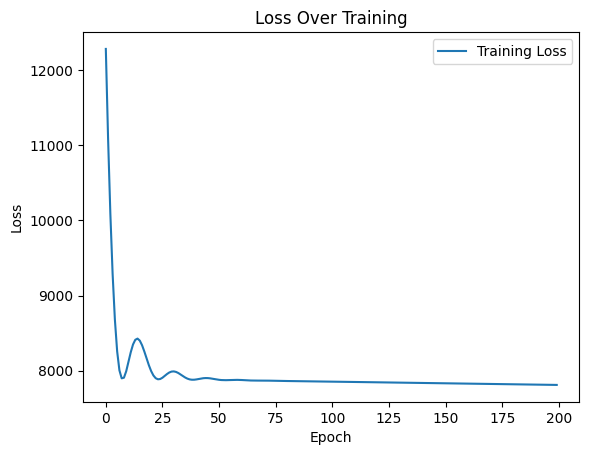

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# 1 Create synthetic dataset
np.random.seed(42)
n_samples = 100

bedrooms = np.random.randint(1, 6, n_samples)
sqft = np.random.randint(500, 5000, n_samples)

price = 50 * bedrooms + 0.1 * sqft + np.random.randn(n_samples) * 10

# Convert to tensors
X = torch.tensor(np.column_stack((bedrooms, sqft)), dtype=torch.float32)
y = torch.tensor(price.reshape(-1, 1), dtype=torch.float32)

# 2 Define neural network
model = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 3 Training loop
losses = []
for epoch in range(200):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()

    if epoch % 50 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.2f}")
        for name, param in model.named_parameters():
            if 'weight' in name:
                print(f"  Gradient mean of {name}: {param.grad.mean():.4f}")

    optimizer.step()
    losses.append(loss.item())

# 4 Plot loss curve
plt.plot(losses, label="Training Loss")
plt.title("Loss Over Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Epoch 1, Loss: 3.93
  Gradient mean of 0.weight: -0.1517
  Gradient mean of 2.weight: 1.0082
Epoch 51, Loss: 3.92
  Gradient mean of 0.weight: -0.1510
  Gradient mean of 2.weight: 1.0043
Epoch 101, Loss: 3.90
  Gradient mean of 0.weight: -0.1502
  Gradient mean of 2.weight: 1.0001
Epoch 151, Loss: 3.89
  Gradient mean of 0.weight: -0.1495
  Gradient mean of 2.weight: 0.9959


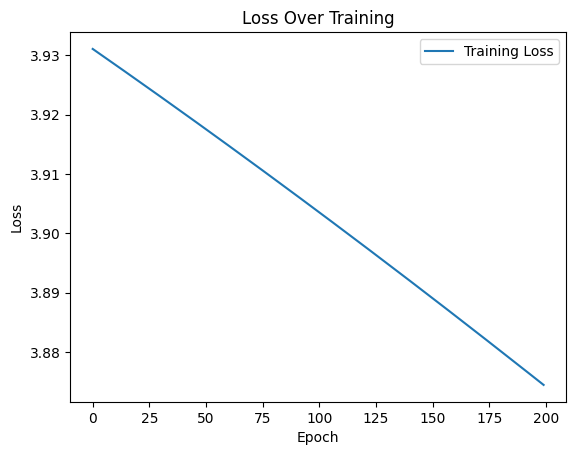

In [5]:
from sklearn.preprocessing import StandardScaler

#1 Standardize both features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = torch.tensor(scaler_X.fit_transform(X), dtype=torch.float32)
y_scaled = torch.tensor(scaler_y.fit_transform(y), dtype=torch.float32)

#2 Define a new model (same architecture)

model2 = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)

criterion2 = nn.MSELoss()
optimizer2 = optim.Adam(model2.parameters(),lr=0.01)

# 3 Training loop
losses = []
for epoch in range(200):
    optimizer.zero_grad()
    outputs = model(X_scaled)
    loss = criterion(outputs, y_scaled)
    loss.backward()

    if epoch % 50 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.2f}")
        for name, param in model.named_parameters():
            if 'weight' in name:
                print(f"  Gradient mean of {name}: {param.grad.mean():.4f}")

    optimizer.step()
    losses.append(loss.item())

# 4 Plot loss curve
plt.plot(losses, label="Training Loss")
plt.title("Loss Over Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()